# Práctica 1: webscraping y visualización

**Objetivo de la práctica**: recopilar, estructurar, limpiar y procesar datos de Internet.

*Se darán por válidas las soluciones con BeautifulSoup y regex*  

**Autor(es)**
- Sergio de la Cruz
- Pablo Ramiro Foronda 

---

In [1]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parte 1: recopilación y estructuración del dataset

Crea un DataFrame con los datos de la url especificada en la constante `URL` y los nombres de columnas recogidos en la lista `column_names`. Utiliza el siguiente como ejemplo:


| Pais                  | Capital          | Poblacion | Area |
|-----------------------|------------------|-----------|------------|
| Andorra               | Andorra la Vella| 84000     | 468.0      |
| United Arab Emirates  | Abu Dhabi        | 4975593   | 82880.0    |
| Afghanistan           | Kabul            | 29121286  | 647500.0   |
| Antigua and Barbuda   | St. John's       | 86754     | 443.0      |
| Anguilla              | The Valley       | 13254     | 102.0      |
| Albania               | Tirana           | 2986952   | 28748.0    |


In [2]:
URL = "http://scrap.coredumped.es"

# nombres de las columnas del dataframe, así tenemos todos los mismos
column_names = ['Pais', 'Capital', 'Poblacion', 'Area']

In [3]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(requests.get(URL).text)
data = []
for paises in soup.findAll('div',class_='col-md-4 country'):
    row = []
    row.append(paises.find('h3',class_='country-name').text.replace(' ','').replace('\n',''))
    row.append(paises.find('span',class_='country-capital').text)
    row.append(paises.find('span',class_='country-population').text)
    row.append(paises.find('span',class_='country-area').text)
    data.append(row)

# nombresP = paises.find('h3',class_='country-name')

df_paises = pd.DataFrame(data, columns=column_names)
df_paises

,Pais,Capital,Poblacion,Area
0,Andorra,Andorra la Vella,84000,468.0
1,UnitedArabEmirates,Abu Dhabi,4975593,82880.0
2,Afghanistan,Kabul,29121286,647500.0
3,AntiguaandBarbuda,St. John's,86754,443.0
4,Anguilla,The Valley,13254,102.0
...,...,...,...,...
245,Yemen,Sanaa,23495361,527970.0
246,Mayotte,Mamoudzou,159042,374.0
247,SouthAfrica,Pretoria,49000000,1219912.0
248,Zambia,Lusaka,13460305,752614.0


# Parte 2: limpieza del dataset


2a) Elimina los valores nulos, si los hubiera. Si los hubiera, ¿destruirías la fila entera o sustituirías el valor nulo por 0?

In [4]:
df_paises = df_paises.dropna()



No lo sustituiria por 0, puede que estar vacio signifique que no hay datos o sea indeterminado y poner 0 podria dar paso a confusiones o resultados incorrectos (especialmente en Poblacion y Area)
Depende de lo que se quiera hacer con los datos puede que esa fila no seria util y eliminaria la fila entera

2b) Asegura que las columnas `País` y `Capital` son de tipo `str`.

In [5]:
print(type(df_paises['Pais'][0]))
print(type(df_paises['Capital'][0]))

<class 'str'>
<class 'str'>


2c) Aplica el mismo procedimiento para las columnas numéricas `Poblacion` y `Area`

In [6]:

print(type(df_paises['Poblacion'][0]))
print(type(df_paises['Area'][0]))

df_paises['Poblacion'] = df_paises['Poblacion'].astype(float)
df_paises['Area'] = df_paises['Area'].astype(float)


print(type(df_paises['Poblacion'][0]))
print(type(df_paises['Area'][0]))

<class 'str'>
<class 'str'>
<class 'numpy.float64'>
<class 'numpy.float64'>


# Parte 3: procesamiento del dataset


3a) Añade la siguiente columna derivada al dataset:
- Densidad de población (Habitantes/km^2)


In [7]:
df_paises['Densidad_Poblacion'] = df_paises.Poblacion/df_paises.Area
df_paises

,Pais,Capital,Poblacion,Area,Densidad_Poblacion
0,Andorra,Andorra la Vella,84000.0,468.0,179.487179
1,UnitedArabEmirates,Abu Dhabi,4975593.0,82880.0,60.033699
2,Afghanistan,Kabul,29121286.0,647500.0,44.974959
3,AntiguaandBarbuda,St. John's,86754.0,443.0,195.832957
4,Anguilla,The Valley,13254.0,102.0,129.941176
...,...,...,...,...,...
245,Yemen,Sanaa,23495361.0,527970.0,44.501318
246,Mayotte,Mamoudzou,159042.0,374.0,425.245989
247,SouthAfrica,Pretoria,49000000.0,1219912.0,40.166832
248,Zambia,Lusaka,13460305.0,752614.0,17.884739


3b) Representa la distribución de la variable `Poblacion`.

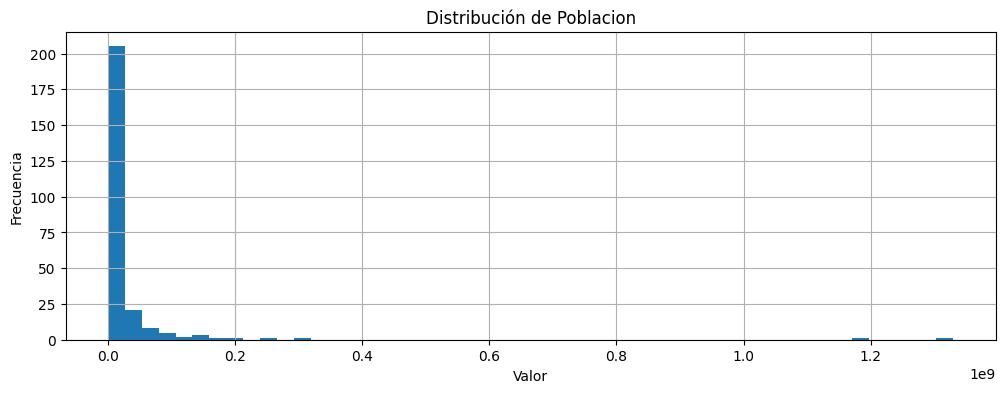

In [8]:
plt.figure(figsize=(12, 4))
plt.hist(df_paises.Poblacion, bins=50)
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Distribución de Poblacion')
plt.grid(True)
plt.show()

3c) ¿Existe alguna correlación entre las variables `Poblacion` y `Area`? Justifica tu respuesta.

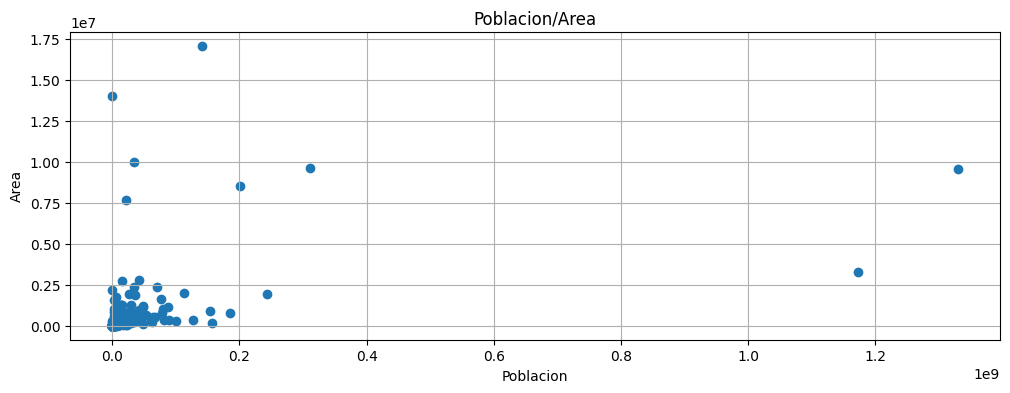

Coeficiente de correlacion entre paises y area:  0.412625235475591


In [9]:
plt.figure(figsize=(12, 4))
plt.scatter(df_paises.Poblacion,df_paises.Area)
plt.xlabel('Poblacion')
plt.ylabel('Area')
plt.title('Poblacion/Area')
plt.grid(True)
plt.show()

coef_corr = df_paises.Poblacion.corr(df_paises.Area)
print("Coeficiente de correlacion entre paises y area: ", coef_corr)

Como se puede ver en el grafico superior no se percibe una correlación explicita entre la poblacion y el area de un pais.
Se puede ver que existen tanto paises con poca poblacion en areas grandes y pequeñas y tambien existen paises con poca extension que tienen mucha y poca poblacion

Solo se puede ver que son más comunes los paises pequeños y/o con menor población que paises grandes y/o con gran poblacion 

Ademas, hallando el coeficiente de correlacion vemos que es 0,4 